# EDA for online_retail dataset
#### online_retail was originally an .xlsx file detailing retail invoices from our company. Using the commented code below, this file was converted to a .csv for ease of use. Additional columns 'Month', 'PurchaseTotal', and 'Cancelled' were appended for readability

#### This notebook provides a high-level overview of the dataset and provides descriptive values and figures about product popularity, etc

# TODO:
<ul>
    <li>More graphs</li>
    <li>More statistical tests</li>
    <li></li>
    <li></li>
</ul>

### Import, setup, load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
online_schema = {
    'InvoiceNo': 'string',
    'StockCode': 'string',
    'Quantity': 'int64',
    'UnitPrice' : 'float64',
    'CustomerID' : 'string',
    'Country' : 'string'
}

UK = 'United Kingdom'

In [27]:
online = pd.read_csv('data/online_retail.csv', parse_dates=True, dtype=online_schema)
online = online.sample(100000)
online['InvoiceDate'] = pd.to_datetime(pd.to_datetime(online['InvoiceDate']).dt.date)

In [28]:
online['PurchaseTotal'] = online['Quantity']*online['UnitPrice']
online['Month'] = online['InvoiceDate'].dt.month
condition = online['InvoiceNo'].str.contains('C')
online['Cancelled'] = np.where(condition, 1, 0)
online_noReturns = online.loc[((online['Quantity'] < 0) & (online['Cancelled'] == 1)) | (online['Quantity'] > 0)]
online_noReturns_noCancels = online.loc[(online['Quantity'] > 0) & (online['Cancelled'] == 0)]

### Correlation between quantity purchased vs price per unit

In [29]:
stats.pearsonr(online_noReturns_noCancels['Quantity'],online_noReturns_noCancels['UnitPrice']).pvalue

0.023524582345668586

### PearsonR correlation PPU cancellation (may be bad)

In [30]:
stats.pearsonr(online_noReturns['Cancelled'],online_noReturns['UnitPrice']).pvalue

2.438071096368293e-109

### Highest mean quantity per purchase - the item bought in highest quantities (on average) at a time

In [31]:
oNR_MQP = online_noReturns_noCancels[['StockCode','Description','Quantity']]
mqpp = oNR_MQP.groupby(['StockCode','Description']).mean(numeric_only=True)
oNR_MQP.loc[oNR_MQP['Quantity'] == mqpp['Quantity'].max()]

,StockCode,Description,Quantity
263885,23343,came coded as 20713,3100


### Lowest mean quantity per purchase - the item bought in lowest quantities (on average) at a time

In [32]:
oNR_MQP.loc[oNR_MQP['Quantity'] == mqpp['Quantity'].min()]

,StockCode,Description,Quantity
67476,21509,COWBOYS AND INDIANS BIRTHDAY CARD,1
518787,23010,CIRCUS PARADE BABY GIFT SET,1
474865,22531,MAGIC DRAWING SLATE CIRCUS PARADE,1
138316,21992,VINTAGE PAISLEY STATIONERY SET,1
22962,22816,CARD MOTORBIKE SANTA,1
...,...,...,...
143708,22723,SET OF 6 HERB TINS SKETCHBOOK,1
129025,22269,EGG CUP NATURAL CHICKEN,1
365652,23403,LETTER HOLDER HOME SWEET HOME,1
143882,71053,WHITE METAL LANTERN,1


### Purchases over time trend - 2011 (the only complete year)

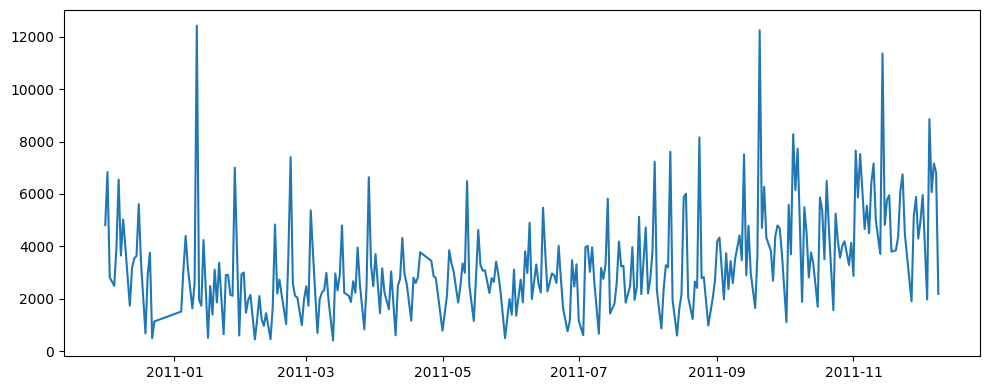

In [33]:
onlineAgg_perDay = online_noReturns_noCancels[['InvoiceDate','Quantity','PurchaseTotal','Month']] \
    .groupby(['InvoiceDate']).sum(numeric_only=True).reset_index()
plt.figure(figsize=(10,4))
plt.plot(onlineAgg_perDay['InvoiceDate'],onlineAgg_perDay['Quantity'])
plt.tight_layout()